In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
file_path = Path("C:/Users/yagin/bootcamp/Week-20-Credit_Risk_Challenge/credit-risk-classification/Credit_Risk/lending_data.csv")
lending_df = pd.read_csv(file_path)

# Review the DataFrame
lending_df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700,7.672,52800,0.431818,5,1,22800,0
1,8400,6.692,43600,0.311927,3,0,13600,0
2,9000,6.963,46100,0.349241,3,0,16100,0
3,10700,7.664,52700,0.430740,5,1,22700,0
4,10800,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [3]:
# Separate the data into labels and features
y = lending_df["loan_status"]

# Separate the y variable, the labels
y = lending_df["loan_status"]

# Separate the X variable, the features
X = lending_df[['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income',
       'num_of_accounts', 'derogatory_marks', 'total_debt']]

In [4]:
# Review the y variable Series
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [5]:
# Review the X variable DataFrame
X.sample(10)

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
2242,9400,7.125,47600,0.369748,3,0,17600
30445,10300,7.498,51200,0.414062,4,1,21200
64707,9900,7.322,49500,0.393939,4,0,19500
5424,9000,6.959,46100,0.349241,3,0,16100
70390,9500,7.167,48000,0.375000,4,0,18000
63905,11900,8.173,57500,0.478261,6,1,27500
57925,10300,7.511,51300,0.415205,4,1,21300
7192,10200,7.468,50900,0.410609,4,1,20900
38754,9300,7.081,47200,0.364407,3,0,17200
53968,6200,5.776,34900,0.140401,1,0,4900


### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [6]:
# Check the balance of our target values
label_counts = y.value_counts()
print(label_counts)

0    75036
1     2500
Name: loan_status, dtype: int64


### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [7]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [8]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
model = LogisticRegression(solver = 'lbfgs', max_iter = 200, random_state=1)

# Fit the model using training data
model.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [9]:
# Make a prediction using the testing data
y_pred = model.predict(X_test)
df_results = pd.DataFrame({
    "y_test": y_test,
    "pred": y_pred
})

df_results.sample(10)

,y_test,pred
15364,0,0
63863,0,0
6241,0,0
72148,0,0
5061,0,0
22170,0,0
71151,0,0
1829,0,0
37236,0,0
37591,0,0


### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [10]:
# Print the balanced_accuracy score of the model
from sklearn.metrics import accuracy_score

In [11]:
# Generate a confusion matrix for the model
confusion_mtx = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mtx)

Confusion Matrix:
[[18663   102]
 [   56   563]]


In [12]:
# Print the classification report for the model
from sklearn.metrics import classification_report

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.85      0.91      0.88       619

    accuracy                           0.99     19384
   macro avg       0.92      0.95      0.94     19384
weighted avg       0.99      0.99      0.99     19384



**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** Based on the Classification Report, the number of healthy loans [0] is greater than the number of high-risk loans [1]. The model has a good accuracy of 99%, precision score for "0" is 100%, and precision for "1" is at 85%.

---

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [13]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
r_model = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
X_resampled, y_resampled = r_model.fit_resample(X_train, y_train)

<Axes: ylabel='loan_status'>

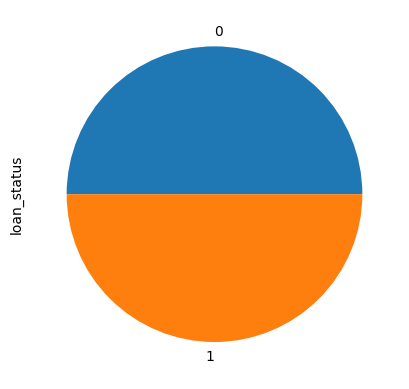

In [14]:
y_resampled.value_counts().plot.pie()

In [15]:
# Count the distinct values of the resampled labels data
label_counts = y_resampled.value_counts()
num_distinct_labels = len(label_counts)

### Step 2: Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

In [16]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
lr_model = LogisticRegression(solver = "lbfgs", max_iter = 200, random_state=1)

# Fit the model using the resampled training data
lr_model.fit(X_resampled, y_resampled)

# Make a prediction using the testing data
testing_prediction = lr_model.predict(X_test)

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [17]:
# Print the balanced_accuracy score of the model 
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, testing_prediction)
accuracy = round(accuracy, 3)
print("Accuracy:", accuracy)

Accuracy: 0.994


In [18]:
# Generate a confusion matrix for the model
from sklearn.metrics import confusion_matrix

confusion_mtx = confusion_matrix(y_test, testing_prediction)
print("Confusion Matrix:")
print(confusion_mtx)

Confusion Matrix:
[[18649   116]
 [    4   615]]


In [19]:
# Print the classification report for the model
from sklearn.metrics import classification_report

classification_rep = classification_report(y_test, testing_prediction)
print("Classification Report")
print(classification_rep)

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.99      0.91       619

    accuracy                           0.99     19384
   macro avg       0.92      0.99      0.95     19384
weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question

**Question:** How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:**  If we look with the previous model it is almost the same , the precision score for 0 loans was 100% and 84% to loan type 1. But recall score the same for hisg-risk loan and healthy loans. Overall,the original model was quite accurate but this model with oversampled data seems to be slightly better at predicting more accurately.